# Harry Potter and the Philosopher's Stone 

## A statistical and literary analysis

### Initialization:

In [71]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import nltk
import re
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import PunktSentenceTokenizer
#nltk.download('maxent_ne_chunker')
#nltk.download('words')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/ubuntu/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
book1 = open('book_1.txt').read()
book2 = open('book_2.txt').read()

In [4]:
book1 = book1.replace('\xad', '').replace('\u00ad', '').replace('\N{SOFT HYPHEN}', '')
book2 = book2.replace('\xad', '').replace('\u00ad', '').replace('\N{SOFT HYPHEN}', '')

In [5]:
class Chapter:
    def __init__(self, number, title, body):
        self.number = number
        self.title = title
        self.body = body
        wc = 0
        for sent in self.body:
            wc += len(sent.split(' '))
        self.wc = wc

In [6]:
class Book:
    def __init__(self, title, author, chapters):
        self.title = title
        self.author = author
        self.chapters = chapters
        self.num_chapters = len(self.chapters)
        self.wc = 0
        for i in range(self.num_chapters):
            self.wc += self.chapters[i].wc
            
    ## flag: t-title, b-body, w-wc, c-chapter, plain-plain body text
    def get(self, num, flag='c'):
        if flag == 't':
            return self.chapters[num-1].title
        elif flag == 'b':
            return self.chapters[num-1].body
        elif flag == 'w':
            return self.chapters[num-1].wc
        elif flag == 'c':
            return self.chapters[num-1]
        elif flag == 'plain':
            return ' '.join(self.chapters[num-1].body)
        else:
            print("Check flag parameter")

In [7]:
def book_creator(text):
    tmp = text.split('\n')
    sents = [s for s in tmp if s != '']
    title = sents[0]
    author = sents[2]
    sents = sents[sents.index('Chapter 1'):]
    
    indicies = []
    chapters = []
    
    for i in range(len(sents)):
        if re.findall("Chapter", sents[i]):
            indicies.append(i)
    
    for i in range(len(indicies)):
        ch_number = int(''.join(list(filter(str.isdigit, sents[indicies[i]]))))
        ch_title = sents[indicies[i]+1]
        if i != len(indicies) - 1:
            ch_body = sents[indicies[i]+2:indicies[i+1]]
        else:
            ch_body = sents[indicies[i]+2:]
                
        chapters.append(Chapter(ch_number, ch_title, ch_body))
                
    return Book(title, author, chapters)

In [8]:
HP = book_creator(book1)

### Word Count 

In [97]:
wc_list = []
for i in range(HP.num_chapters):
    wc_list.append(HP.get(i, 'w'))
    
print(wc_list)

[5604, 4664, 3474, 3893, 3772, 6668, 6356, 4517, 3064, 4975, 4317, 3394, 5548, 3222, 3511, 5146, 6537]


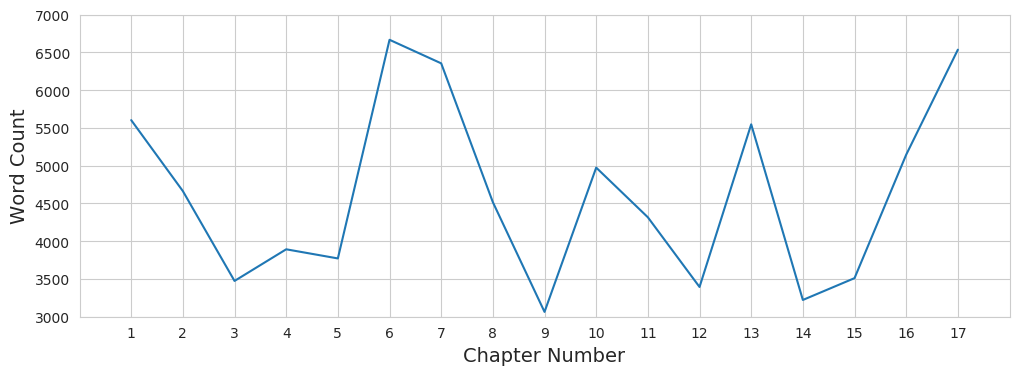

In [132]:
ax = plt.subplots(figsize=(12,4),dpi=100)
ax = sns.lineplot(x=list(range(1, (HP.num_chapters + 1))), y=wc_list)
ax.set_ylim(3000, 7000)
ax.set_xlim(0, 18)
ax.set_xlabel("Chapter Number", fontsize=14)
ax.set_ylabel("Word Count", fontsize=14)
_ = ax.set_xticks(list(range(1, (HP.num_chapters + 1))))

### Sentence Length 

In [128]:
sent_len_list = []
for i in range(1, (HP.num_chapters + 1)):
    sum = 0
    body = HP.get(i, 'b')
    for s in body:
        sum += len(s.split(' '))
    sent_len_list.append(sum/len(body))

print(sent_len_list)
    

[42.4, 34.74, 29.270676691729324, 24.65359477124183, 22.835616438356166, 22.146341463414632, 24.155080213903744, 33.30434782608695, 23.578199052132703, 26.323170731707318, 24.773722627737225, 26.932038834951456, 25.983870967741936, 25.258992805755394, 27.372340425531913, 20.428125, 24.471615720524017]


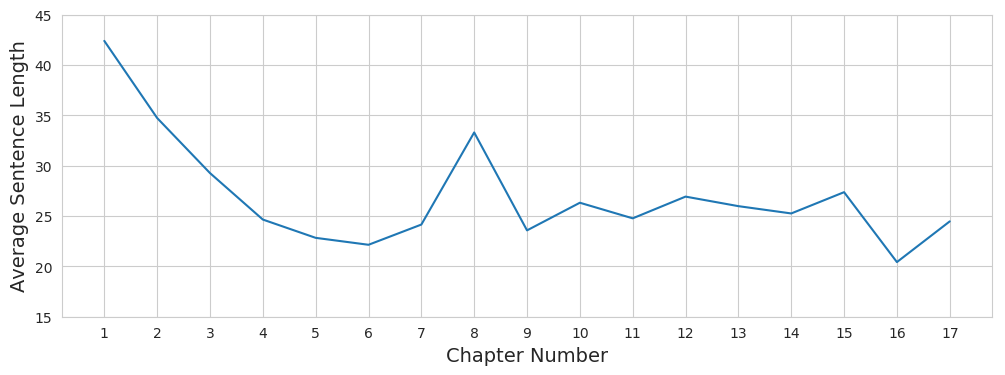

In [136]:
ax = plt.subplots(figsize=(12,4),dpi=100)
ax = sns.lineplot(x=list(range(1, (HP.num_chapters + 1))), y=sent_len_list)
ax.set_ylim(15, 45)
#ax.set_xlim(0, 18)
ax.set_xlabel("Chapter Number", fontsize=14)
ax.set_ylabel("Average Sentence Length", fontsize=14)
_ = ax.set_xticks(list(range(1, (HP.num_chapters + 1))))

### Character name count

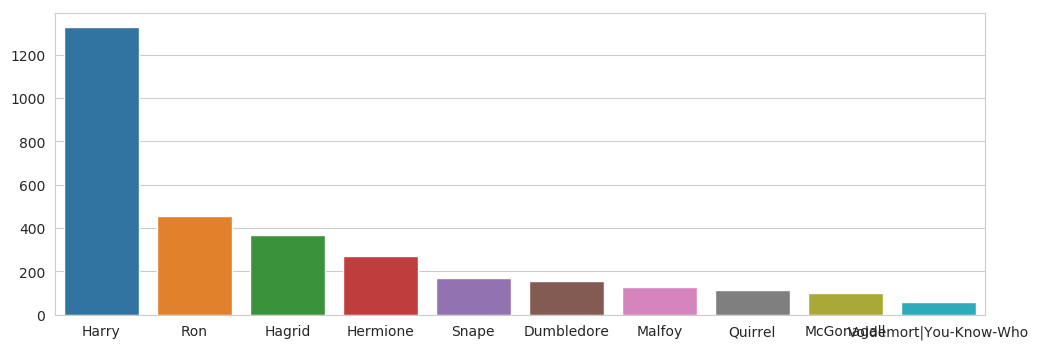

In [64]:
mains = ["Harry", "Ron", "Hagrid", "Hermione", "Snape", "Dumbledore", "Malfoy", "Quirrel", "McGonagall", "Voldemort|You-Know-Who"]
mains_count = [len(re.findall(m, book1)) for m in mains]

ax = plt.subplots(figsize=(12,4),dpi=100)
ax = sns.barplot(x=mains, y=mains_count)

In [77]:
tokens[-7000:-6500]

['.',
 '“',
 'Why',
 'do',
 'you',
 'think',
 'he',
 'wanted',
 'to',
 'referee',
 'your',
 'next',
 'match',
 '?',
 'He',
 'was',
 'trying',
 'to',
 'make',
 'sure',
 'I',
 'didn',
 '’',
 't',
 'do',
 'it',
 'again',
 '.',
 'Funny',
 ',',
 'really',
 '…',
 'he',
 'needn',
 '’',
 't',
 'have',
 'bothered',
 '.',
 'I',
 'couldn',
 '’',
 't',
 'do',
 'anything',
 'with',
 'Dumbledore',
 'watching',
 '.',
 'All',
 'the',
 'other',
 'teachers',
 'thought',
 'Snape',
 'was',
 'trying',
 'to',
 'stop',
 'Gryffindor',
 'from',
 'winning',
 ',',
 'he',
 'did',
 'make',
 'himself',
 'unpopular',
 '…',
 'and',
 'what',
 'a',
 'waste',
 'of',
 'time',
 ',',
 'when',
 'after',
 'all',
 'that',
 ',',
 'I',
 '’',
 'm',
 'going',
 'to',
 'kill',
 'you',
 'tonight.',
 '”',
 'Quirrell',
 'snapped',
 'his',
 'fingers',
 '.',
 'Ropes',
 'sprang',
 'out',
 'of',
 'thin',
 'air',
 'and',
 'wrapped',
 'themselves',
 'tightly',
 'around',
 'Harry',
 '.',
 '“',
 'You',
 '’',
 're',
 'too',
 'nosy',
 'to',
 'l

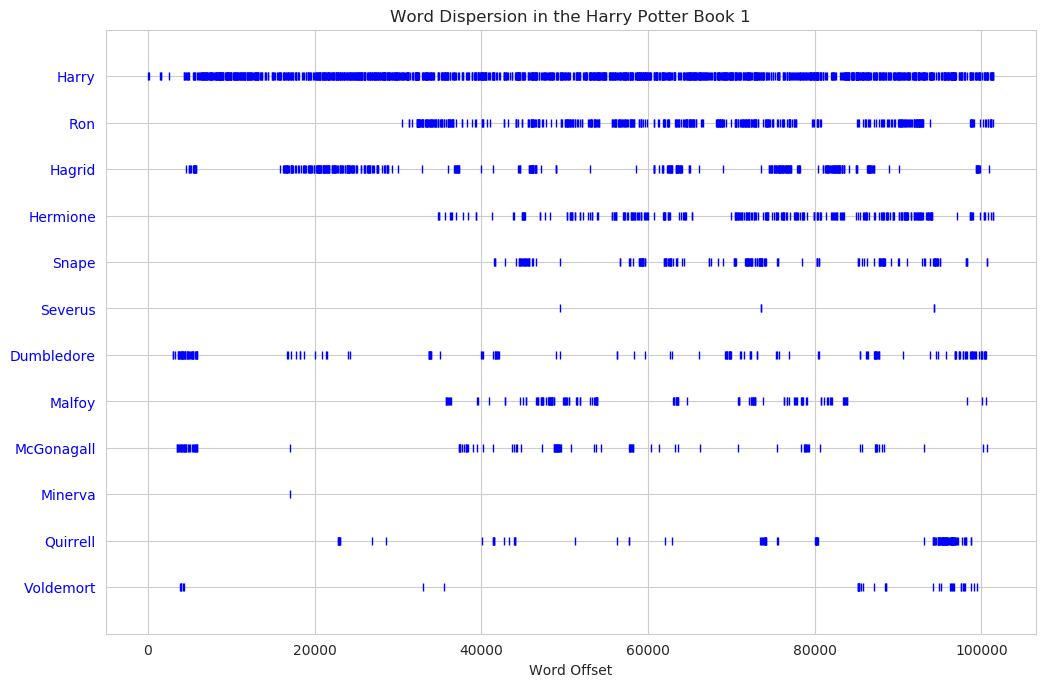

In [96]:
tokens = nltk.word_tokenize(book1)
mytext = nltk.Text(tokens)

words = ["Harry", "Ron", "Hagrid", "Hermione", "Snape", "Severus", "Dumbledore", "Malfoy", "McGonagall", "Minerva", "Quirrell", "Voldemort"]
plt.subplots(figsize=(12,8),dpi=100)
nltk.draw.dispersion.dispersion_plot(
    mytext, words, ignore_case=False,
    title='Word Dispersion in the Harry Potter Book 1'
)

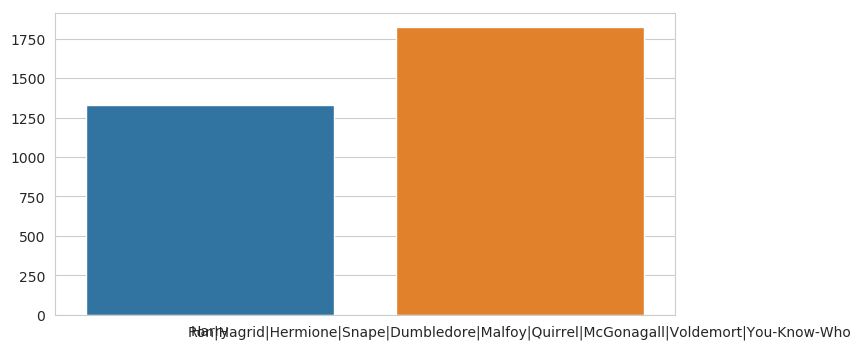

In [68]:
mains = ["Harry", "Ron|Hagrid|Hermione|Snape|Dumbledore|Malfoy|Quirrel|McGonagall|Voldemort|You-Know-Who"]
mains_count = [len(re.findall(m, book1)) for m in mains]
ax = plt.subplots(figsize=(8,4),dpi=100)
ax = sns.barplot(x=mains, y=mains_count)

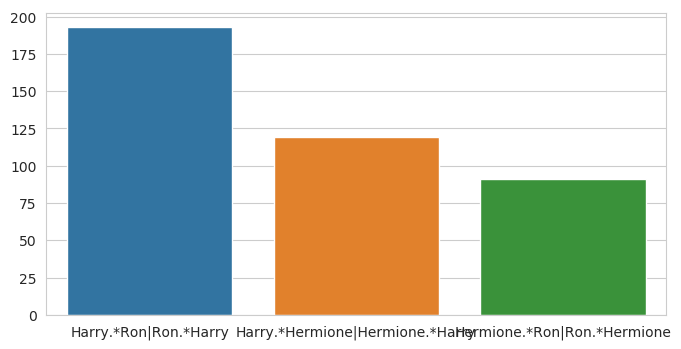

In [19]:
mains = ["Harry.*Ron|Ron.*Harry", "Harry.*Hermione|Hermione.*Harry", "Hermione.*Ron|Ron.*Hermione"]
mains_count = [len(re.findall(m, book1)) for m in mains]

ax = plt.subplots(figsize=(8,4),dpi=100)
ax = sns.barplot(x=mains, y=mains_count)

### Locations count

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

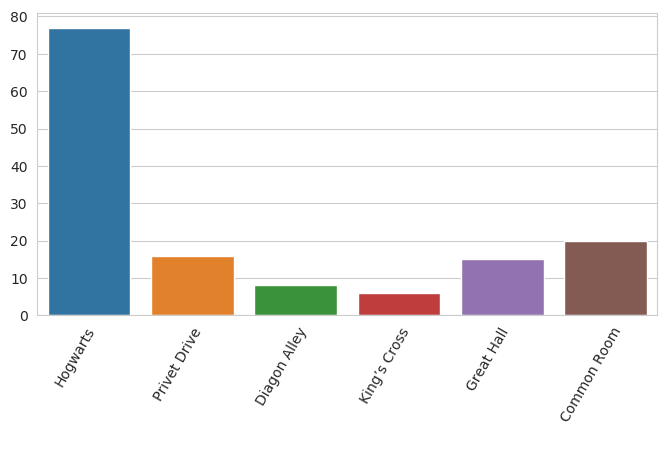

In [45]:
loc = ["Hogwarts", "Privet", "Diagon Alley", "King’s Cross", "Great Hall", "(c|C)ommon (r|R)oom"]
xticks = ["Hogwarts\n\n", "Privet Drive\n\n", "Diagon Alley\n\n", "King’s Cross\n\n", "Great Hall\n\n", "Common Room\n\n"]
loc_count = [len(re.findall(l, book1)) for l in loc]

ax = plt.subplots(figsize=(8,4),dpi=100)
ax = sns.barplot(x=xticks, y=loc_count)
plt.xticks(rotation=60)

### Spell count

Text(0, 0.5, 'Count')

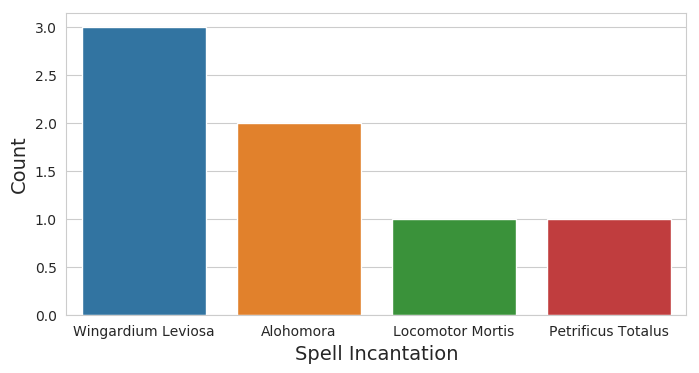

In [46]:
spells = ["Wingardium Leviosa", "Alohomora", "Locomotor Mortis", "Petrificus Totalus"]
spell_count = [len(re.findall(s, book1)) for s in spells]

ax = plt.subplots(figsize=(8,4),dpi=100)
ax = sns.barplot(x=spells, y=spell_count)
ax.set_xlabel("Spell Incantation", fontsize=14)
ax.set_ylabel("Count", fontsize=14)

### Subject mention count 

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

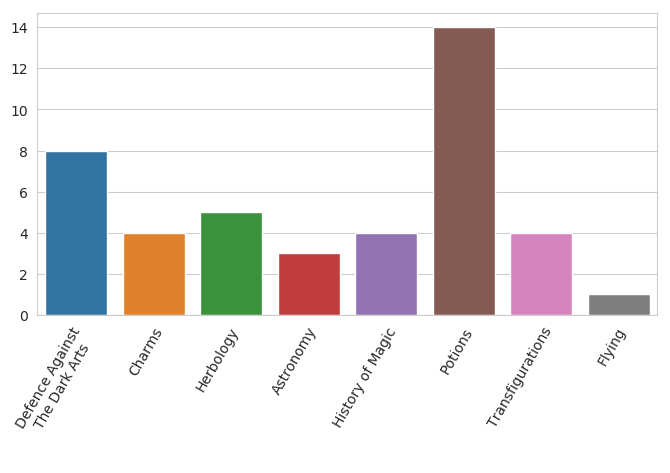

In [41]:
sub = ["Dark Arts", "Charms", "Herbology", "Astronomy", "History of Magic", "Potions", "Transfiguration", "Flying"]
xticks = ["Defence Against\nThe Dark Arts\n\n\n", "Charms\n", "Herbology\n\n", "Astronomy\n\n", "History of Magic\n\n\n", "Potions\n", "Transfigurations\n\n\n", "Flying\n"]
sub_count = [len(re.findall(s, book1)) for s in sub]

ax = plt.subplots(figsize=(8,4),dpi=100)
ax = sns.barplot(x=xticks, y=sub_count)
plt.xticks(rotation=60)

### Parts-of-speech Tagging

In [9]:
tagged = nltk.pos_tag(HP.get(1, 'plain').split(' '))

In [10]:
tagged

[('Mr.', 'NNP'),
 ('and', 'CC'),
 ('Mrs.', 'NNP'),
 ('Dursley,', 'NNP'),
 ('of', 'IN'),
 ('number', 'NN'),
 ('four,', 'JJ'),
 ('Privet', 'NNP'),
 ('Drive,', 'NNP'),
 ('were', 'VBD'),
 ('proud', 'JJ'),
 ('to', 'TO'),
 ('say', 'VB'),
 ('that', 'IN'),
 ('they', 'PRP'),
 ('were', 'VBD'),
 ('perfectly', 'RB'),
 ('normal,', 'JJ'),
 ('thank', 'NN'),
 ('you', 'PRP'),
 ('very', 'RB'),
 ('much.', 'VBP'),
 ('They', 'PRP'),
 ('were', 'VBD'),
 ('the', 'DT'),
 ('last', 'JJ'),
 ('people', 'NNS'),
 ('you’d', 'VBP'),
 ('expect', 'VB'),
 ('to', 'TO'),
 ('be', 'VB'),
 ('involved', 'VBN'),
 ('in', 'IN'),
 ('anything', 'NN'),
 ('strange', 'JJ'),
 ('or', 'CC'),
 ('mysterious,', 'NN'),
 ('because', 'IN'),
 ('they', 'PRP'),
 ('just', 'RB'),
 ('didn’t', 'VBP'),
 ('hold', 'JJ'),
 ('with', 'IN'),
 ('such', 'JJ'),
 ('nonsense.', 'JJ'),
 ('Mr.', 'NNP'),
 ('Dursley', 'NNP'),
 ('was', 'VBD'),
 ('the', 'DT'),
 ('director', 'NN'),
 ('of', 'IN'),
 ('a', 'DT'),
 ('firm', 'NN'),
 ('called', 'VBN'),
 ('Grunnings,', 'NNP')

### Sentiment Analysis

In [11]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
compound = []
for i in range(HP.num_chapters):
    sentiments = {'compound': 0.0, 'neg': 0.0, 'neu': 0.0, 'pos': 0.0}
    sentence_list = HP.get(i+1, 'b')
    for sentence in sentence_list:
        vs = analyzer.polarity_scores(sentence)
        sentiments['compound'] += vs['compound']
        compound.append(vs['compound'])
        sentiments['neg'] += vs['neg']
        sentiments['neu'] += vs['neu']
        sentiments['pos'] += vs['pos']
        
    print(HP.get(i+1, 't'), ': ', sentiments['compound'] / len(sentence_list))
    sentiments['compound'] = sentiments['compound'] / len(sentence_list)
    
    sentiments['neg'] = sentiments['neg'] / len(sentence_list)
    sentiments['neu'] = sentiments['neu'] / len(sentence_list)
    sentiments['pos'] = sentiments['pos'] / len(sentence_list)

The Boy Who Lived :  0.1251
The Vanishing Glass :  -0.027945000000000008
The Letters From No One :  0.01075563909774435
The Keeper Of The Keys :  -0.010157516339869268
Diagon Alley :  0.06974863013698632
The Journey from Platform Nine and Three-Quarters :  0.049345993031358885
The Sorting Hat :  0.07772620320855624
The Potions Master :  0.06972065217391303
The Midnight Duel :  -0.002878672985781986
Halloween :  0.030455487804878088
Quidditch :  -0.027618978102189794
The Mirror Of Erised :  0.07511456310679608
Nicholas Flamel :  0.02581451612903226
Norbert the Norwegian Ridgeback :  0.01698920863309353
The Forbidden Forest :  -0.1182627659574468
Through the Trapdoor :  0.0118465625
The Man With Two Faces :  0.026805240174672482


In [12]:
#sum(map(lambda x:x,compound[64:128]))

In [13]:
def sumRange(L,a,b):                                                                                                                                                                                                
    sum = 0                                                                                                                                                                                                         
    for i in range(a,b,1):                                                                                                                                                                                        
        sum += L[i]                                                                                                                                                                                                  
    return sum

indicies, bins = ([] for i in range(2))
parts = int(len(compound)/256)
for i in range(0,256):
    indicies.append((i*parts + (i+1)*parts)/2)
    bins.append(sumRange(compound, i*parts, (i+1)*parts)/12)
    

In [14]:
sum(compound)/len(compound)

0.024627734374999873

Text(0, 0.5, 'Sentiment')

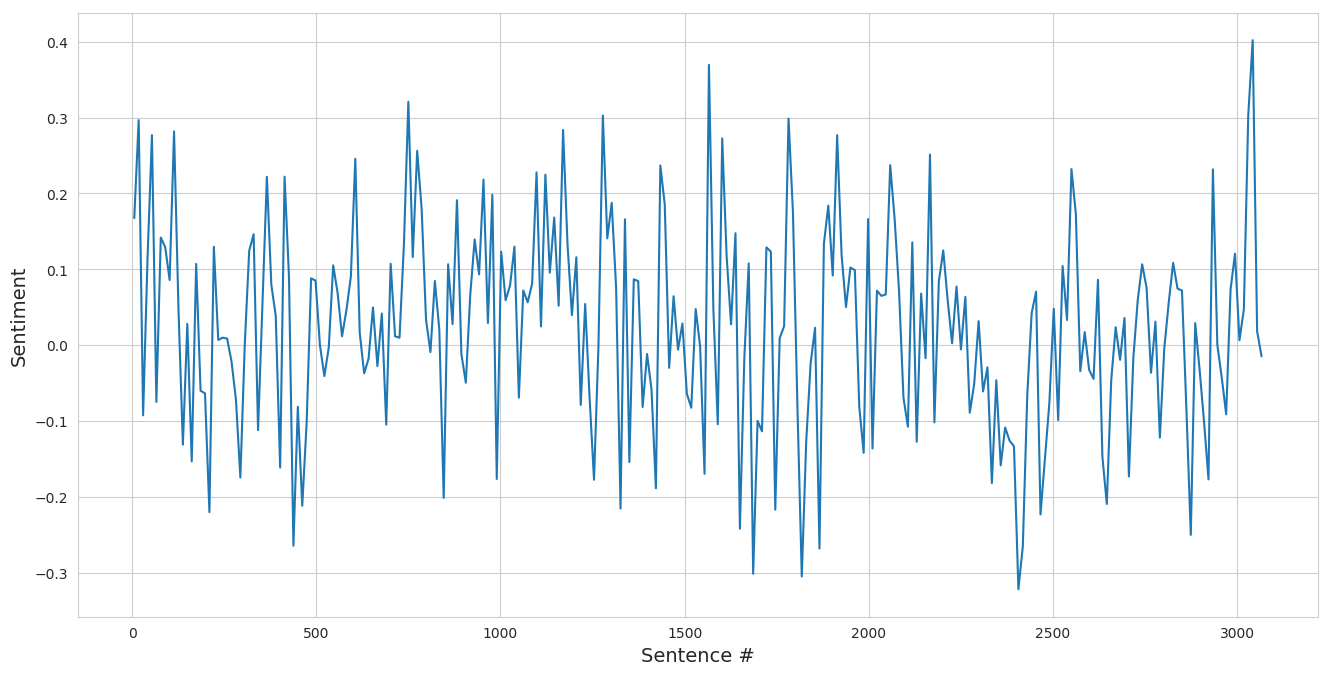

In [15]:
sns.set_style("whitegrid")
ax = plt.subplots(figsize=(16,8),dpi=100)
ax = sns.lineplot(x=indicies, y=bins)
ax.set_xlabel("Sentence #", fontsize=14)
ax.set_ylabel("Sentiment", fontsize=14)